In [1]:
import pandas as pd

In [2]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [3]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [4]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [5]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Удаляем столбцы содержащие строковые значения
drop_list = [
    'hotel_address',
    'review_date',
    'hotel_name',
    'reviewer_nationality',
    'negative_review',
    'positive_review',
    'tags','days_since_review']
X_train = X_train.drop(drop_list,axis=1)
X_test = X_test.drop(drop_list,axis=1)

# Заполняем пропуски в данных
X_train['lat'].fillna(X_train['lat'].mean(),inplace=True)
X_train['lng'].fillna(X_train['lng'].mean(),inplace=True)
X_test['lat'].fillna(X_test['lat'].mean(),inplace=True)
X_test['lng'].fillna(X_test['lng'].mean(),inplace=True)

In [68]:
# Импортируем необходимые библиотеки:  
#from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
#from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [69]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))


MAPE: 0.14139310126433405


Небольшой бонус:


In [9]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [11]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

In [12]:
X['lat'].fillna(X['lat'].mean(),inplace=True)
X['lng'].fillna(X['lng'].mean(),inplace=True)

<AxesSubplot:>

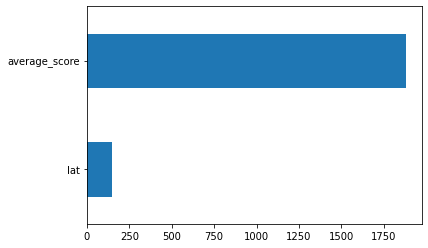

In [13]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

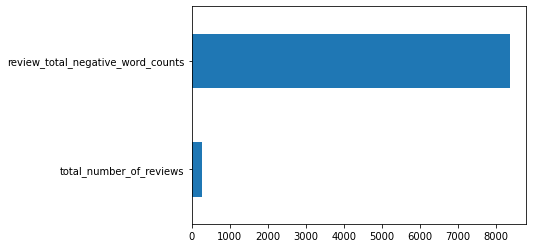

In [14]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [48]:
# Функция принимает на вход строку, преобразует ее в список тэгов
# и возвращает уникальный список тэгов таблицы
uniq_tags_set = set() # задаем пустое множетсво, в которе будем добавлять тэги
def get_tags(tags_str):
         
    tags_list = tags_str[1:-1] # удаляем скобки вначале и в конце строки
    tags_list = tags_list.replace("' ","") # удаляем кавычки вначале тэга
    tags_list = tags_list.replace(" '","") # удаляем кавычки вконце тэга
    tags_list = tags_list.split(', ') # разделяем строку на отдельные тэги
    
    #uniq_tags_list = uniq_tags_list.add(*tags_list)
    for elem in tags_list:
        uniq_tags_set.add(elem)
    #   if elem not in uniq_tags_list:
    #        uniq_tags_list.append(elem)
    return(uniq_tags_set)
    
X['tags'].apply(get_tags)

0         {Luxury Room 3 Adults with canal view, Deluxe ...
1         {Luxury Room 3 Adults with canal view, Deluxe ...
2         {Luxury Room 3 Adults with canal view, Deluxe ...
3         {Luxury Room 3 Adults with canal view, Deluxe ...
4         {Luxury Room 3 Adults with canal view, Deluxe ...
                                ...                        
386798    {Luxury Room 3 Adults with canal view, Deluxe ...
386799    {Luxury Room 3 Adults with canal view, Deluxe ...
386800    {Luxury Room 3 Adults with canal view, Deluxe ...
386801    {Luxury Room 3 Adults with canal view, Deluxe ...
386802    {Luxury Room 3 Adults with canal view, Deluxe ...
Name: tags, Length: 386803, dtype: object

In [62]:
# Функция принимает на вход строку, преобразует ее в список тэгов
# и возвращает словарь тэгов таблицы, где значения - количество их повтров в ячейках таблицы

uniq_tags_dict = dict() # задаем словарь, в который будем добавлять тэги
def get_tags(tags_str):
         
    tags_list = tags_str[1:-1] # удаляем скобки вначале и в конце строки
    tags_list = tags_list.replace("' ","") # удаляем кавычки вначале тэга
    tags_list = tags_list.replace(" '","") # удаляем кавычки вконце тэга
    tags_list = tags_list.split(', ') # разделяем строку на отдельные тэги
    
    for elem in tags_list:
        if elem in uniq_tags_dict.keys():
            uniq_tags_dict[elem] = int(uniq_tags_dict.get(elem)) + 1 
        else:
            uniq_tags_dict[elem] = 1
    
    return(uniq_tags_dict)
    
X['tags'].apply(get_tags)

# Количество уникальных тэгов в таблице
len(uniq_tags_dict)

2368

In [65]:
# Отсоритируем словарь с тэгами по значению в порядке убывания 

sorted_values = sorted(uniq_tags_dict.values(),reverse=True) # Создадим отсортированный список со значениями 
sorted_dict = {} # пустой словарь, куда будем добавлять отсортированные ключи со значениями

for i in sorted_values:
    for k in uniq_tags_dict.keys():
        if uniq_tags_dict[k] == i:
            sorted_dict[k] = uniq_tags_dict[k]
            break

print(sorted_dict)

{'Leisure trip': 313593, 'Submitted from a mobile device': 230778, 'Couple': 189212, 'Stayed 1 night': 145373, 'Stayed 2 nights': 100263, 'Solo traveler': 81235, 'Stayed 3 nights': 72000, 'Business trip': 61989, 'Group': 49088, 'Family with young children': 45836, 'Stayed 4 nights': 35748, 'Double Room': 26386, 'Standard Double Room': 24151, 'Superior Double Room': 23550, 'Family with older children': 19802, 'Deluxe Double Room': 18623, 'Double or Twin Room': 16824, 'Stayed 5 nights': 15611, 'Standard Double or Twin Room': 13062, 'Classic Double Room': 12716, 'Superior Double or Twin Room': 10238, '2 rooms': 9287, 'Stayed 6 nights': 7399, 'Standard Twin Room': 7325, 'Single Room': 7227, 'Twin Room': 6279, 'Stayed 7 nights': 5549, 'Executive Double Room': 4763, 'Classic Double or Twin Room': 4576, 'Superior Twin Room': 4540, 'Club Double Room': 4485, 'Deluxe Double or Twin Room': 4465, 'Queen Room': 4071, 'Deluxe King Room': 3993, 'Superior Queen Room': 3686, 'Standard Single Room': 347

In [67]:
len(uniq_tags_dict)

2368

In [16]:
X['review_date'] = pd.to_datetime(X['review_date'],yearfirst=True)